# Planificación del proyecto

Se requiere construir una red neuronal de alimentación hacia adelante para clasificar las imágenes según el número. Obtén métricas para las diferentes clases con el fin de demostrar el correcto rendimiento del modelo. ¿Se clasifican igual todas las imágenes?

El dataset a utilizar es el que aparece en la carpeta: [mnist csv](./MNIST_CSV)

Los objetivos a cumplir son los siguientes:
- Construir una red neuronal de alimentación hacia delante.
- ¿Se clasifican igual todas las imágenes?

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def plot_grid(X, y, grid_size, labelNames):# Define the grid size
    # Create a figure to hold the images
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 10))

    for i in range(grid_size):
        for j in range(grid_size):
            # Calculate the index into the image array
            index = i * grid_size + j
            
            # Display the image
            axes[i, j].imshow(X[index], cmap='gray')
            
            # Remove the axis
            axes[i, j].axis('off')
            
            # Add a title with the label from y_train
            axes[i, j].set_title(f'Label: {labelNames[y[index]]}')

    # Show the plot
    plt.show()

def print_metrics(predictions, X_test, y_test, labelNames, H, epochs):

    print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1), target_names=labelNames))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

## 1. Carga de los datos

In [1]:
from tensorflow.keras.datasets import mnist

# Paso 1: Cargar el conjunto de datos MNIST
((X_train,y_train), (X_test, y_test)) = mnist.load_data()

print("Tamaño de X_train: ", X_train.shape[0])
print("Tamaño de X_test: ", X_test.shape[0])

print("Tamaño total del dataset: ", X_train.shape[0] + X_test.shape[0])


print("Porcentaje de datos de entrenamiento: ", X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))
print("Porcentaje de datos de test: ", X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Tamaño de X_train:  60000
Tamaño de X_test:  10000
Tamaño total del dataset:  70000
Porcentaje de datos de entrenamiento:  0.8571428571428571
Porcentaje de datos de test:  0.14285714285714285


In [2]:
import numpy as np

# Obtenemos los nombres de las clases de la base de datos
labelNames = ["0", "1", "2", "3", "4",
	"5", "6", "7", "8", "9"]

print("Número de clases en el dataset: ", len(labelNames))

# Contar el numero de casos diferentes en una lista
unique, counts = np.unique(y_train, return_counts=True)
print("Numero de casos y su distribucion en el dataset de entrenamiento: ", dict(zip(unique, counts)))

Número de clases en el dataset:  10
Numero de casos y su distribucion en el dataset de entrenamiento:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


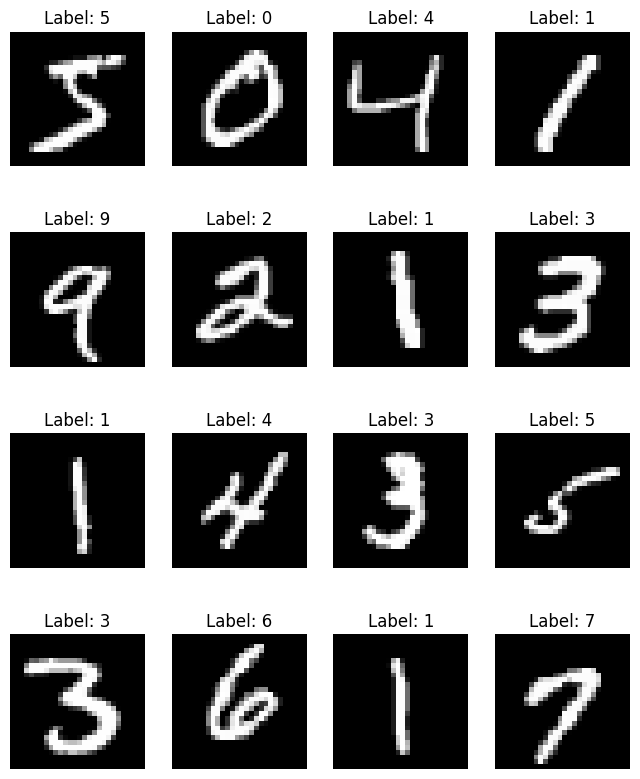

In [7]:
plot_grid(X_train, y_train, 4, labelNames)

### 1.1. Preparación de los datos de entrada.

In [8]:
# Normalizamos los valores de la imagenes entre 0 y 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Tamaño de la imagen", X_train[0].shape)
print("---------")
print("Tamaño del vector de la imagen", X_train[0].shape[0] * X_train[0].shape[1])
print("Tamaño del vector de la imagen", X_train[0].flatten().shape[0])

# Convertimos las imagenes (matrices) en vectores planos de 3072 elementos
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))

Tamaño de la imagen (28, 28)
---------
Tamaño del vector de la imagen 784
Tamaño del vector de la imagen 784


In [9]:
from sklearn.preprocessing import LabelBinarizer

# Binariamos las etiquetas (one-hot encoding), conviertiendolas de un valor numerico a un vector de 10 elementos
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

print(f"Nueva estructura de las etiquetas -> {y_test[0]}")

Nueva estructura de las etiquetas -> [0 0 0 0 0 0 0 1 0 0]


## 2. Red Neuronal

### 2.1. Diseño de la Red Neuronal
Llegados a este punto, hemos preparado los datos de entrada, por lo que los requisitios para el diseño de la RN serán:

 - Debe tener **784** neuronas en la capa de **entrada**
 - Debe tener **10** neuronas en la capa de **salida**
 - Necesitamos una función de activacion de clasificacion multicalse -> **softmax**

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Construir el modelo
model = Sequential()
model.add(Dense(1024, input_shape=(784,), activation="relu"))
model.add(Dropout(0.5))  # Añadir Dropout para regularización
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# Usar un optimizador SGD con una tasa de aprendizaje de 0.001
optimizer = SGD(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configurar EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con EarlyStopping
H = model.fit(X_train, y_train, epochs=200, batch_size=150, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200


c:\Users\Jaime Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1242 - loss: 2.3420 - val_accuracy: 0.5112 - val_loss: 2.0737
Epoch 2/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2504 - loss: 2.1223 - val_accuracy: 0.6852 - val_loss: 1.8614
Epoch 3/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3856 - loss: 1.9440 - val_accuracy: 0.7426 - val_loss: 1.6534
Epoch 4/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4820 - loss: 1.7646 - val_accuracy: 0.7772 - val_loss: 1.4529
Epoch 5/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5550 - loss: 1.5966 - val_accuracy: 0.7957 - val_loss: 1.2688
Epoch 6/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6003 - loss: 1.4409 - val_accuracy: 0.8141 - val_loss: 1.1109
Epoch 7/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6359 - loss: 1.3072 - val_accuracy: 0.8263 - val_loss: 0.9806
Epoch 8/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6639 - loss: 1.1949 - val_accuracy

### 2.2. Evaluamos el entrenamiento

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.93      0.95      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.96      0.92      0.94       892
           6       0.94      0.96      0.95       958
           7       0.95      0.94      0.95      1028
           8       0.94      0.93      0.93       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



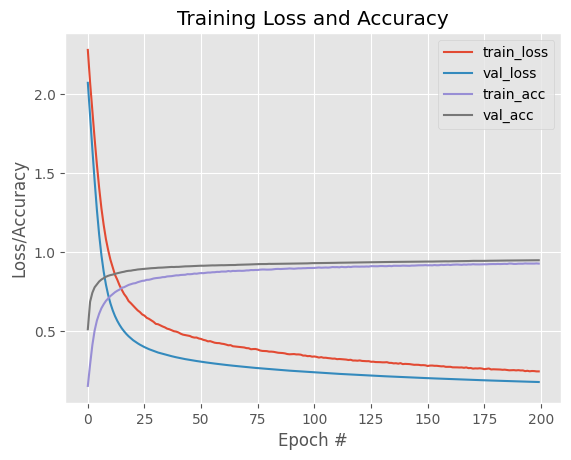

In [15]:
predictions = model.predict(X_test, batch_size=150)

print_metrics(predictions, X_test, y_test, labelNames, H, 200)

El informe de clasificación nos proporciona una visión detallada del rendimiento del modelo para cada clase (dígitos del 0 al 9) en términos de precisión, recall y F1-score. Vamos a interpretar estos resultados y evaluar el rendimiento del modelo.

#### Interpretación de las Métricas

1. **Precisión (Precision)**: Indica la proporción de verdaderos positivos (correctamente identificados) entre todos los positivos predichos (verdaderos positivos + falsos positivos). Una precisión alta significa que el modelo tiene pocos falsos positivos.
2. **Recall (Recall)**: Indica la proporción de verdaderos positivos entre todos los positivos reales (verdaderos positivos + falsos negativos). Un recall alto significa que el modelo tiene pocos falsos negativos.
3. **F1-score**: Es la media armónica de la precisión y el recall, proporcionando un balance entre ambas métricas. Es útil cuando buscamos un equilibrio entre precisión y recall.
4. **Support**: El número de ocurrencias reales de la clase en el conjunto de prueba.

#### Análisis por Clase

- **Clase 0**: 
  - Precisión: 0.95
  - Recall: 0.99
  - F1-score: 0.97
  - Soporte: 980
  - Interpretación: El modelo clasifica muy bien la clase 0 con un alto recall y precisión, indicando muy pocos falsos negativos y falsos positivos.

- **Clase 1**: 
  - Precisión: 0.97
  - Recall: 0.98
  - F1-score: 0.98
  - Soporte: 1135
  - Interpretación: La clase 1 también tiene un excelente rendimiento con alta precisión y recall, lo que sugiere que la mayoría de las imágenes de esta clase son correctamente identificadas.

- **Clase 2**: 
  - Precisión: 0.95
  - Recall: 0.93
  - F1-score: 0.94
  - Soporte: 1032
  - Interpretación: La clase 2 tiene una precisión ligeramente más baja comparada con su recall, indicando algunos falsos positivos.

- **Clases 3 a 9**: Todas estas clases muestran un rendimiento bastante bueno con precisiones y recalls alrededor de 0.93 a 0.96, y F1-scores en el mismo rango. Las ligeras diferencias en las métricas sugieren que el modelo tiene un rendimiento consistente y confiable en todas las clases, aunque hay variaciones menores.

#### Métricas Globales

- **Accuracy**: 0.95
  - La exactitud general del modelo es del 95%, lo cual es excelente para un clasificador de dígitos.

- **Macro avg (Promedio macro)**: 
  - Precisión: 0.95
  - Recall: 0.95
  - F1-score: 0.95
  - El promedio macro da igual peso a cada clase, mostrando un rendimiento balanceado.

- **Weighted avg (Promedio ponderado)**: 
  - Precisión: 0.95
  - Recall: 0.95
  - F1-score: 0.95
  - El promedio ponderado tiene en cuenta el soporte (número de instancias) de cada clase, lo que confirma un rendimiento sólido del modelo considerando la distribución de las clases.

## Conclusiones

1. **Rendimiento Consistente**: El modelo tiene un rendimiento consistente y alto en todas las clases, con precisiones, recalls y F1-scores alrededor de 0.94 a 0.98.
2. **Exactitud Global Alta**: Con una exactitud del 95%, el modelo es eficaz en clasificar imágenes de dígitos del 0 al 9.
3. **Balance entre Precisión y Recall**: Las métricas muestran un buen equilibrio, indicando que el modelo es capaz de minimizar tanto los falsos positivos como los falsos negativos.

Este rendimiento sugiere que el modelo es adecuado para la tarea de clasificación de dígitos y puede ser utilizado en aplicaciones prácticas que requieren reconocimiento de dígitos escritos a mano, como el procesamiento automático de formularios o la digitalización de documentos escritos a mano.